In [68]:
import numbers
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from numpy import interp
from sklearn import metrics
from itertools import cycle

In [69]:
np.random.seed(0)
pd.set_option('display.width', 300)
np.set_printoptions(suppress=True)
data = pd.read_csv('iris.data', header=None)

In [70]:
iris_types = data[4].unique()

In [71]:
for i, iris_type in enumerate(iris_types):
    data.set_value(data[4] == iris_type,4,i)

In [72]:
x = data.iloc[:,:2]

In [73]:
n, features= x.shape

In [74]:
y = data.iloc[:,-1].astype(np.int)
c_number = np.unique(y).size

In [75]:
x,x_test,y,y_test = train_test_split(x,y,test_size=0.4,random_state=0)

In [76]:
y_one_hot = label_binarize(y_test,classes=np.arange(c_number))

In [77]:
alpha = np.logspace(-2,2,20)

In [78]:
models = [['KNN', KNeighborsClassifier(n_neighbors=7)],
        ['LogisticRegression', LogisticRegressionCV(Cs=alpha, penalty='l2', cv=3)],
        ['SVM(Linear)', GridSearchCV(SVC(kernel='linear', decision_function_shape='ovr'), param_grid={'C': alpha})],
        ['SVM(RBF)', GridSearchCV(SVC(kernel='rbf', decision_function_shape='ovr'), param_grid={'C': alpha, 'gamma': alpha})]]

In [79]:
colors = cycle('gmcr')
mpl.rcParams['font.sans-serif'] = 'SimHei'
mpl.rcParams['axes.unicode_minus'] = False
plt.figure(figsize=(7, 6), facecolor='w')

0.877083333333
[ 2.06913808  2.06913808  0.11288379]
0.890972222222
{'C': 0.11288378916846889}
0.880694444444
{'C': 0.18329807108324356, 'gamma': 0.48329302385717521}
0.892361111111


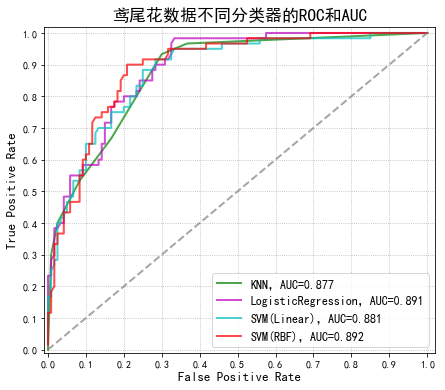

In [80]:
for (name, model), color in zip(models, colors):
    model.fit(x, y)
    if hasattr(model, 'C_'):
        print((model.C_))
    if hasattr(model, 'best_params_'):
        print((model.best_params_))
    if hasattr(model, 'predict_proba'):
        y_score = model.predict_proba(x_test)
    else:
        y_score = model.decision_function(x_test)
    fpr, tpr, thresholds = metrics.roc_curve(y_one_hot.ravel(), y_score.ravel())
    auc = metrics.auc(fpr, tpr)
    print(auc)
    plt.plot(fpr, tpr, c=color, lw=2, alpha=0.7, label='%s，AUC=%.3f' % (name, auc))
plt.plot((0, 1), (0, 1), c='#808080', lw=2, ls='--', alpha=0.7)
plt.xlim((-0.01, 1.02))
plt.ylim((-0.01, 1.02))
plt.xticks(np.arange(0, 1.1, 0.1))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.xlabel('False Positive Rate', fontsize=13)
plt.ylabel('True Positive Rate', fontsize=13)
plt.grid(b=True, ls=':')
plt.legend(loc='lower right', fancybox=True, framealpha=0.8, fontsize=12)
# plt.legend(loc='lower right', fancybox=True, framealpha=0.8, edgecolor='#303030', fontsize=12)
plt.title('鸢尾花数据不同分类器的ROC和AUC', fontsize=17)
plt.show()